This notebook fits the three population and two population model deterministically to the ethidium bromide experiment.

In [ ]:
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt
import data_preprocessing.data_preprocessing as data

SMALL_SIZE = 15
MEDIUM_SIZE = 21
BIGGER_SIZE = 21

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [7]:
def three_population(t, mu_a, mu_d, f_o, N_0 = data.mean_deg_nuc_list[0]):

    A = mu_d*f_o-mu_a
    B = mu_d*(1-f_o)
    C = N_0/(mu_d-mu_a)

    return C*(A*np.exp(-mu_d*t) + B*np.exp(-mu_a*t))

def two_population(t, mu_d, N_0 = data.mean_deg_nuc_list[0]):

    return N_0*np.exp(-mu_d*t)

times = np.array([0,1,3,7,24,48,24*5,24*10,24*15,24*20])
popt3, pcov3 = so.curve_fit(three_population, times, data.mean_deg_nuc_list, p0 = np.array([0.01,0.3,0.8,1300]))
popt2, pcov2 = so.curve_fit(two_population, times, data.mean_deg_nuc_list, p0 = np.array([0.01,1300]))

In [18]:
print("two population:")
print("turnover rate = " + str(round(popt2[0], 3)) + "±" + str(round(np.sqrt(pcov2[0,0]), 3)))
print("three population:")
print("mu_a = " + str(round(popt3[0], 3)) + "±" + str(round(np.sqrt(pcov3[0,0]), 3)))
print("mu_d = " + str(round(popt3[1], 3)) + "±" + str(round(np.sqrt(pcov3[1,1]), 3)))
print("Old fraction = " + str(round(popt3[2], 3)) + "±" + str(round(np.sqrt(pcov3[2,2]), 3)))

two population:
turnover rate = 0.016±0.003
three population:
mu_a = 0.009±0.001
mu_d = 0.327±0.099
Old fraction = 0.366±0.041


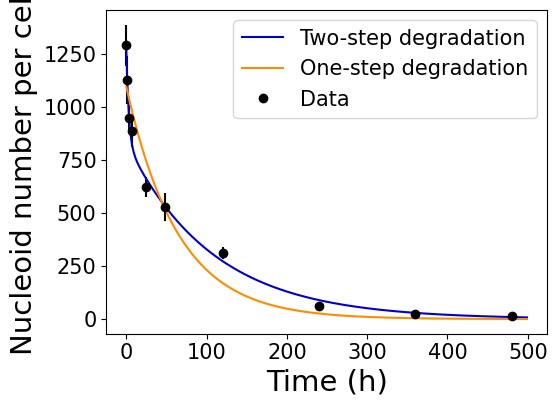

In [8]:
times2 = np.arange(500)
plt.figure(1, figsize = (6,4.5))
plt.errorbar(times, data.mean_deg_nuc_list, (np.sqrt(data.var_mean_deg_nuc_list), np.sqrt(data.var_mean_deg_nuc_list)), ls = 'none', ecolor = 'black')
plt.plot(times2, three_population(times2, popt3[0], popt3[1], popt3[2], popt3[3]), label = "Two-step degradation", color = "mediumblue")
plt.plot(times2, two_population(times2, popt2[0], popt2[1]), label = "One-step degradation", color = "darkorange")
plt.plot(times, data.mean_deg_nuc_list, "o",color = "black", label = "Data")
plt.xlabel("Time (h)")
plt.ylabel("Nucleoid number per cell")
plt.legend()
plt.tight_layout()